In [2]:
%load_ext autoreload
%autoreload 2

import os
%cd ..
%cd ..

/home/ext-daniel-packer/documents/noteboooks/equivariant-attention/notebooks
/home/ext-daniel-packer/documents/noteboooks/equivariant-attention


In [159]:
from models import translation_attention, positional_encodings, vanilla_attention, naive_translation_attention
import jax
from jax import numpy as jnp, random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from matplotlib import colormaps
import numpy as np
from jax.test_util import check_grads

rngs = random.split(random.PRNGKey(seed=2), 10)
%matplotlib inline

In [161]:
d = 5
n_keys = 10
n_data_samples = 10

x = random.normal(rngs[1], [n_data_samples, d])
x = x / jnp.linalg.norm(x, axis = -1, keepdims = True)
y = x

model = naive_translation_attention.NaiveAttentionModel(rngs[0], n_keys, d, lr=0.05)

check_grads(model.call_fn, (x[0], *model.params), order=1)

# translation_attention.call_fn(x[0], jnp.fft.fft(model.keys, axis=-1), jnp.fft.fft(model.values, axis=-1), model.beta)
# losses = []
# for i in tqdm(range(10)):
#     loss = model.train_step(x, y)
#     losses.append(loss.item())


Array([ 0.15863173+0.j,  0.23471111+0.j, -0.00825388+0.j,  0.337291  +0.j,
        0.3790324 +0.j], dtype=complex64)

In [162]:
model.call_fn(x[0], model.keys, model.values, model.beta)

Array([0.299325  , 2.7302983 , 0.44635302, 3.9257455 , 3.1934037 ],      dtype=float32)

In [174]:
def wrapped_nvolve(x, y):
  return jax.scipy.signal.convolve(x, jnp.flip(jnp.concatenate([y, y])), mode="valid")[:-1]

# def func(x):
#   return jax.scipy.signal.convolve(x[0], jnp.flip(jnp.concatenate([x[1], x[1]])), mode="valid").sum()

In [176]:
# check_grads(func, [x], order = 1)
wrapped_nvolve(x[0], x[1])

Array([ 7.8511131e-01, -2.7613497e-01,  4.4733095e-01,  6.8750978e-04,
       -4.8713326e-01], dtype=float32)

In [179]:
jnp.roll(jnp.fft.ifft(jnp.fft.fft(x[0]) * jnp.fft.fft(jnp.flip(x[1]))).real, 1)

Array([ 7.8511137e-01, -2.7613503e-01,  4.4733104e-01,  6.8750384e-04,
       -4.8713332e-01], dtype=float32)

In [169]:
jax.grad(func)(x)

Array([[1.7327075 , 0.6488017 , 1.4036094 , 0.75483954, 0.9737955 ],
       [1.0206428 , 0.5632683 , 1.1908246 , 0.07584274, 0.21720785],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]],      dtype=float32)

In [148]:
jnp.dot(jnp.roll(x[0], 2), x[1])

Array(-0.8335539, dtype=float32)

[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'loss'), None]

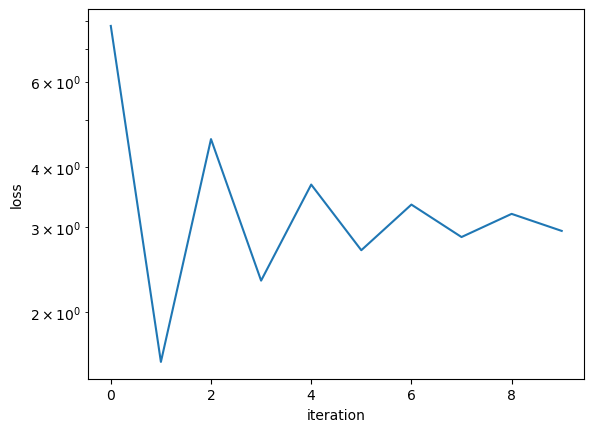

In [128]:
fig, ax = plt.subplots()
ax.plot(losses)
ax.set(xlabel='iteration', ylabel='loss',  yscale='log')

[Array([[ 1.30887294e+00,  4.83382083e-02,  5.15672982e-01,
         -1.05046034e+00, -5.42906106e-01],
        [-6.15593970e-01,  1.17650199e+00, -2.68675447e-01,
          1.38517535e+00,  2.88998914e+00],
        [ 1.97652650e+00, -3.88963550e-01, -7.20743299e-01,
         -6.58611596e-01,  1.51448643e+00],
        [ 2.11368132e+00,  3.63791645e-01, -5.67351937e-01,
         -3.66456360e-01,  7.87808597e-02],
        [ 1.05026118e-01, -1.37953651e+00,  8.08237553e-01,
         -1.46414125e+00,  1.53571343e+00],
        [-7.27021620e-02, -1.05765617e+00,  5.24525642e-01,
          2.19811410e-01,  1.41750777e+00],
        [ 1.17880893e+00, -5.46664774e-01, -4.91437882e-01,
          4.92209017e-01, -1.90815598e-01],
        [-7.40284681e-01, -1.29082870e+00, -9.53830361e-01,
          7.48913959e-02, -2.36659944e-01],
        [-2.33449268e+00,  1.11780477e+00, -3.99195343e-01,
         -2.77748138e-01, -1.08091712e+00],
        [-2.70700186e-01,  1.34123397e+00,  5.14080763e-01,
    